In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# #taking data from yahoo finance
# start = '2015-01-01'
# end = '2026-01-01'
# stock = 'GOOG'

# data = yf.download(stock, start, end)

In [83]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define available stock options
stocks = {
    'Google (GOOGL)': 'GOOGL',
    'Apple (AAPL)': 'AAPL',
    'Microsoft (MSFT)': 'MSFT',
    'Amazon (AMZN)': 'AMZN',
    'Tesla (TSLA)': 'TSLA',
    'Facebook (FB)': 'FB',
    'NVDIA (NVDA)': 'NVDA',
    'Reliance (RELIANCE.NS)': 'RELIANCE.NS',
    'TCS (TCS.NS)': 'TCS.NS',
    'Tata Motors (TATAMOTORS.NS)': 'TATAMOTORS.NS'
}

# Create dropdown widget
stock_selector = widgets.Dropdown(
    options=list(stocks.keys()),
    description='Choose Stock:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

output_stock = widgets.Output()

def on_stock_change(change):
    with output_stock:
        clear_output()
        selected_stock_name = change['new']
        selected_symbol = stocks[selected_stock_name]
        print(f"📈 Fetching data for: {selected_stock_name} ({selected_symbol})...")
        global data, start, end, stock  # make 'data', 'start', 'end', and 'stock' available to rest of notebook
        stock = selected_symbol # Update the global stock variable
        start = '2015-01-01' # Define start date
        end = '2026-01-01' # Define end date
        data = yf.download(selected_symbol, start=start, end=end)
        display(data.tail())

# Attach callback
stock_selector.observe(on_stock_change, names='value')

# Display dropdown and output
display(stock_selector, output_stock)

# Trigger initial selection to load data on notebook run
on_stock_change({'new': list(stocks.keys())[0]})

Dropdown(description='Choose Stock:', layout=Layout(width='50%'), options=('Google (GOOGL)', 'Apple (AAPL)', '…

Output()

In [84]:
data

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...
2025-06-26,325.779999,331.049988,323.609985,324.609985,80440900
2025-06-27,323.630005,329.339996,317.500000,324.510010,89067000


In [85]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
1,2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2,2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
3,2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
4,2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...
2635,2025-06-26,325.779999,331.049988,323.609985,324.609985,80440900
2636,2025-06-27,323.630005,329.339996,317.500000,324.510010,89067000
2637,2025-06-30,317.660004,325.579987,316.600006,319.899994,76695100


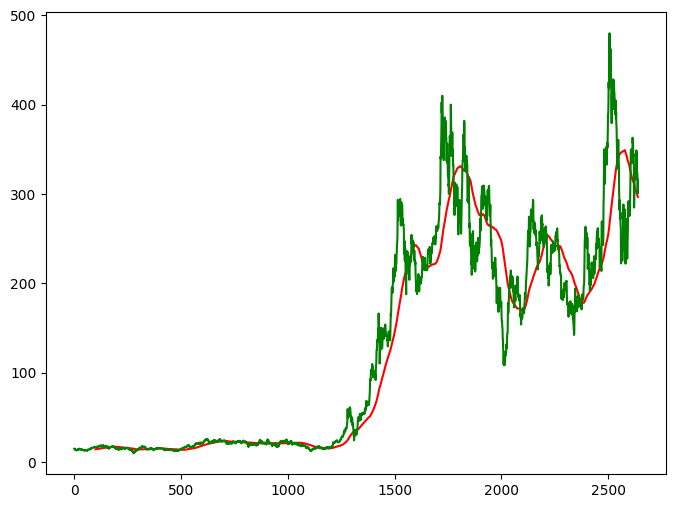

In [86]:
#moving average 100 days
ma_100_days=data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

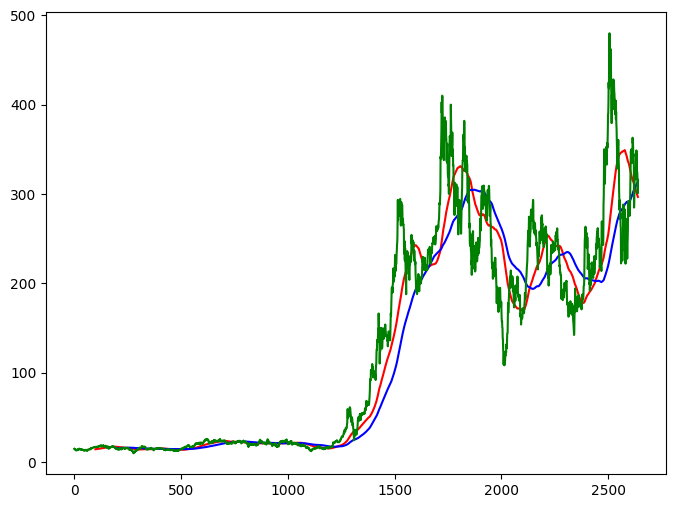

In [87]:
#moving average of 200 days
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [88]:
data.dropna(inplace=True)

In [89]:
#80% training data 20%test data
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close.iloc[int(len(data)*0.80):len(data)])

In [90]:
data_train.shape[0]

2112

In [91]:
data_test.shape[0]

528

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [93]:
data_train_scale= scaler.fit_transform(data_train)

In [94]:
#array slicing -take 100 data and pred 101th data- of training data

x=[]
y=[]

for  i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [95]:
x,y=np.array(x),np.array(y)

In [96]:
from keras.layers import Dense ,Dropout ,LSTM
from keras.models import Sequential

In [97]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [98]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - loss: 0.0530
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0059
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0063
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0059
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0071
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0049
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0051
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0043
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0047
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0041
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0041
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0043
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0037
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0044
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0032
Ep

In [99]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [100]:
pas_100_days=data_train.tail(100)

In [101]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [102]:
data_test

Ticker,TSLA
0,121.820000
1,123.180000
2,108.099998
3,113.639999
4,110.339996
...,...
623,325.779999
624,323.630005
625,317.660004
626,300.709991


In [103]:
data_test_scale=scaler.fit_transform(data_test)

In [104]:
#array sclicing of test data
x=[]
y=[]

for  i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [105]:
y_predict=model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step


In [106]:
y_predict

array([[0.17094383],
       [0.17698082],
       [0.1841985 ],
       [0.19244763],
       [0.20222509],
       [0.21380407],
       [0.22709408],
       [0.24196243],
       [0.25807235],
       [0.2750318 ],
       [0.2921411 ],
       [0.30950117],
       [0.32777372],
       [0.3471453 ],
       [0.36772308],
       [0.38784215],
       [0.40510276],
       [0.4183493 ],
       [0.42899454],
       [0.43588418],
       [0.4390852 ],
       [0.43827325],
       [0.43267077],
       [0.42350316],
       [0.4127187 ],
       [0.40227592],
       [0.39415708],
       [0.39195663],
       [0.39803487],
       [0.4109137 ],
       [0.42690253],
       [0.4414559 ],
       [0.45199335],
       [0.4580256 ],
       [0.46088868],
       [0.46233967],
       [0.4647688 ],
       [0.46957564],
       [0.47635907],
       [0.47998634],
       [0.47792035],
       [0.471271  ],
       [0.46158534],
       [0.45039564],
       [0.43832982],
       [0.42700648],
       [0.41792944],
       [0.411

In [107]:
scale=1/scaler.scale_

In [108]:
y_predict=y_predict*scale

In [109]:
y=y*scale

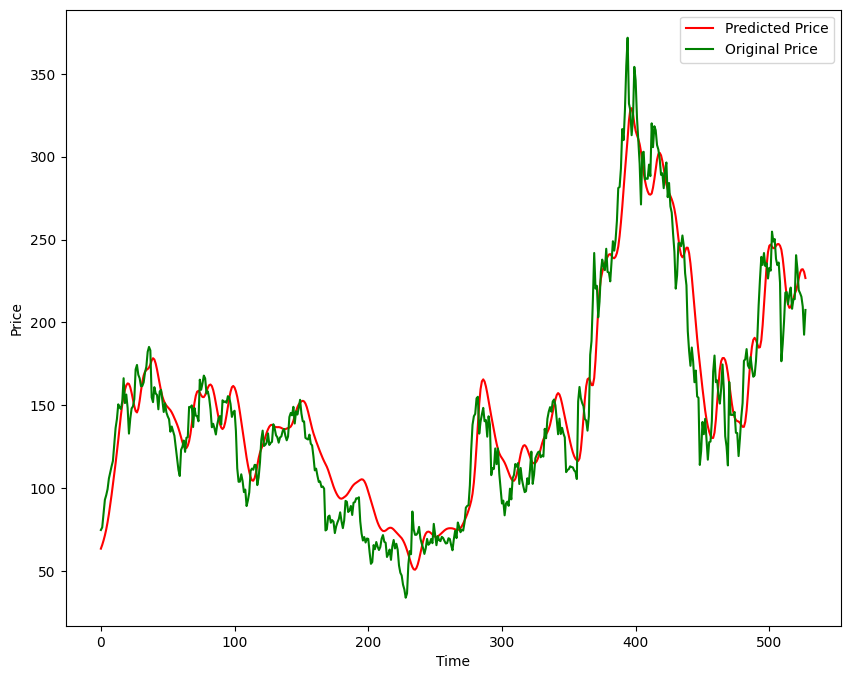

In [110]:
#original vs predicted price
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label="Predicted Price")
plt.plot(y,'g',label="Original Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [111]:
# prompt: also print accuracy percentage

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y, y_predict)
rmse = np.sqrt(mean_squared_error(y, y_predict))
r2 = r2_score(y, y_predict)

# Calculate accuracy percentage (using R-squared as a proxy for explanatory power)
# R-squared indicates how well the model explains the variance in the target variable.
# While not a direct 'accuracy' in terms of classification, it's a common metric
# in regression to gauge how well the predictions fit the actual data.
# We'll present it as a percentage for ease of understanding.
accuracy_percentage = r2 * 100

# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# print(f"R-squared (R2): {r2:.4f}")
print(f"Accuracy Percentage: {accuracy_percentage:.2f}%")

Accuracy Percentage: 91.05%


In [112]:
#predicting 7 days price
from sklearn.preprocessing import MinMaxScaler

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data[['Close']]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)


In [113]:

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(df_scaled, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [114]:
#small model to predict 7 days price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0222
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0010
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 9.6701e-04
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3848e-04
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.7923e-04
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.3635e-04
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.9494e-04
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 6.1487e-04
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.3288e-04
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.3550e-04
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1819e-04
Epoch 13/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9672e-04
Epoch 14/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4889e-04
Epoch 15/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/

In [115]:
#7days
n_future_days = 7
last_window = df_scaled[-window_size:].reshape(1, window_size, 1)
future_predictions = []

for _ in range(n_future_days):
    next_pred = model.predict(last_window)[0][0]
    future_predictions.append(next_pred)
    last_window = np.append(last_window[:, 1:, :], [[[next_pred]]], axis=1)

future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


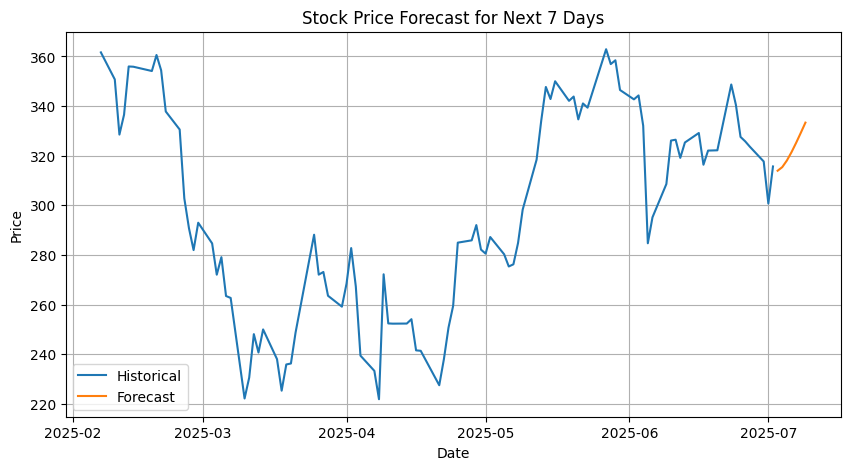

In [116]:
#plotting next 7 days price
import matplotlib.pyplot as plt
import pandas as pd

last_date = df.index[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, n_future_days + 1)]

plt.figure(figsize=(10,5))
plt.plot(df.index[-100:], df.Close[-100:], label='Historical')
plt.plot(future_dates, future_predictions_actual, label='Forecast')
plt.legend()
plt.title('Stock Price Forecast for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


/tmp/ipython-input-117-1749786193.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  live_data = yf.download(stock, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


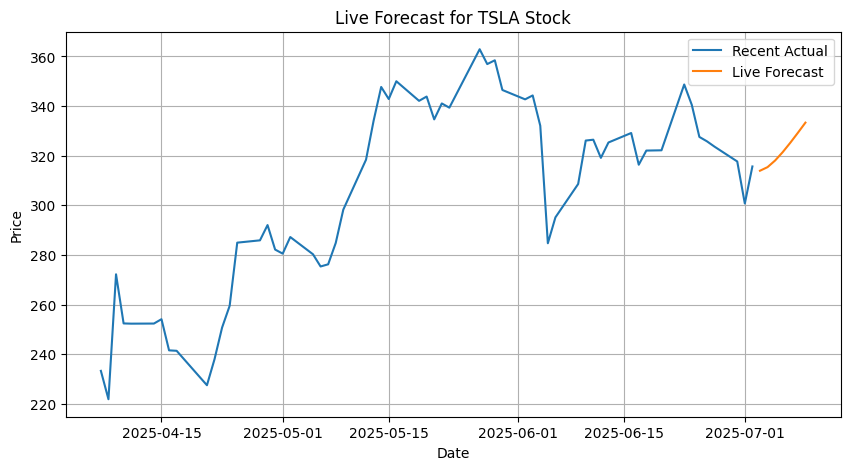

[[313.92575]
 [315.37964]
 [318.05182]
 [321.4151 ]
 [325.19193]
 [329.20065]
 [333.31308]]


In [117]:
##Live predicting of price of future days


# Fetch most recent data (past 100 days to today)
import datetime

end_date = datetime.datetime.now().date()
start_date = end_date - datetime.timedelta(days=100)

live_data = yf.download(stock, start=start_date, end=end_date)
live_data.reset_index(inplace=True)
live_data.set_index('Date', inplace=True)

# Prepare and scale
live_df = live_data[['Close']]
live_scaled = scaler.transform(live_df)

# Update prediction window
last_window_live = live_scaled[-window_size:].reshape(1, window_size, 1)

# Predict next 7 days using the trained model
live_predictions = []

for _ in range(n_future_days):
    next_pred = model.predict(last_window_live)[0][0]
    live_predictions.append(next_pred)
    last_window_live = np.append(last_window_live[:, 1:, :], [[[next_pred]]], axis=1)

live_predictions_actual = scaler.inverse_transform(np.array(live_predictions).reshape(-1, 1))

# Future dates for the live forecast
last_live_date = live_df.index[-1]
live_future_dates = [last_live_date + pd.Timedelta(days=i) for i in range(1, n_future_days + 1)]

# Plot
plt.figure(figsize=(10,5))
plt.plot(live_df.index[-60:], live_df.Close[-60:], label='Recent Actual')
plt.plot(live_future_dates, live_predictions_actual, label='Live Forecast')
plt.title(f'Live Forecast for {stock} Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
print(live_predictions_actual)

In [118]:
#predicting price of 7 days  by selecting dates- next 7 days


import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# Assuming 'future_dates' contains list of predicted dates
# and 'predicted_prices' contains corresponding predictions
# Modify these if named differently
try:
    future_data = pd.DataFrame({
        "Date": pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=7),
        "Predicted Price": live_predictions_actual.flatten()
    })
except Exception as e:
    print("Error generating prediction view:", e)
    raise

# Widget to select a date
date_selector = widgets.Dropdown(
    options=[(str(date.date()), i) for i, date in enumerate(future_data["Date"])],
    description='Select Date:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

output = widgets.Output()

def on_date_change(change):
    with output:
        clear_output()
        idx = change['new']
        selected_row = future_data.iloc[idx]
        print(f"Prediction for {selected_row['Date'].date()}: ₹{selected_row['Predicted Price']:.2f}")

date_selector.observe(on_date_change, names='value')

display(date_selector, output)
# Trigger initial display
on_date_change({'new': 0})

Dropdown(description='Select Date:', layout=Layout(width='50%'), options=(('2025-07-03', 0), ('2025-07-04', 1)…

Output()